In [1]:
import pandas as pd 
import numpy as np 
import warnings 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df0=pd.read_csv("/content/drive/MyDrive/Classroom/DS- Data set/insure_2.csv")

In [3]:
df0.head()

,age,sex,bmi,children,smoker,region,charges,medical_problem,Unnamed: 8,Unnamed: 9
0,18,male,33.770,1,no,southeast,1725.55230,light,NaN,NaN
1,28,male,33.000,3,no,southeast,4449.46200,light,NaN,NaN
2,33,male,22.705,0,no,northwest,21984.47061,severe,NaN,NaN
3,32,male,28.880,0,no,northwest,3866.85520,light,NaN,NaN
4,31,female,25.740,0,no,southeast,3756.62160,light,NaN,NaN


In [4]:
df=df0.drop(['Unnamed: 8', 'Unnamed: 9'], axis=1)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges,medical_problem
0,18,male,33.770,1,no,southeast,1725.55230,light
1,28,male,33.000,3,no,southeast,4449.46200,light
2,33,male,22.705,0,no,northwest,21984.47061,severe
3,32,male,28.880,0,no,northwest,3866.85520,light
4,31,female,25.740,0,no,southeast,3756.62160,light


In [6]:
df.isna().sum()

age                0
sex                0
bmi                0
children           0
smoker             0
region             0
charges            0
medical_problem    0
dtype: int64

In [7]:
df.shape

(1338, 8)

In [8]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 15.8 MB/s 


In [9]:
import sweetviz as sv
report=sv.analyze(df)
report.show_html("./insurance.html")

                                             |          | [  0%]   00:00 -> (? left)

Report ./insurance.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [10]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


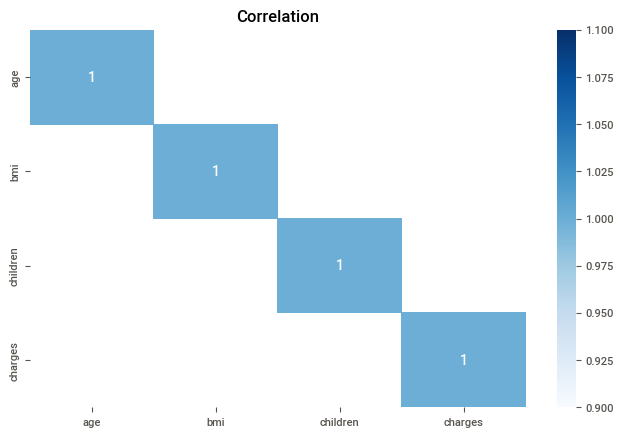

In [11]:
corr = df.corr()
plt.figure(figsize = (8,5))
plt.title('Correlation')
sns.heatmap(corr,mask = corr<0.4 ,annot= True,cmap = 'Blues')

In [12]:
class Pie_plot():
  def __init__(self,serie,title,colors,explode):
    self.serie=serie
    self.title=title
    self.colors=colors
    self.explode=explode
  def pie(self):
    self.serie.plot(kind='pie',title=self.title, figsize=[20,8],
                     colors=self.colors,explode=self.explode,
          autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*self.serie.sum()))
class Pie_Option(Pie_plot):
  def option_plot(self,option):
    if option== "region":
      super().pie()
    elif option == "smoker":
      super().pie()
    elif option == "sex":
      super().pie()

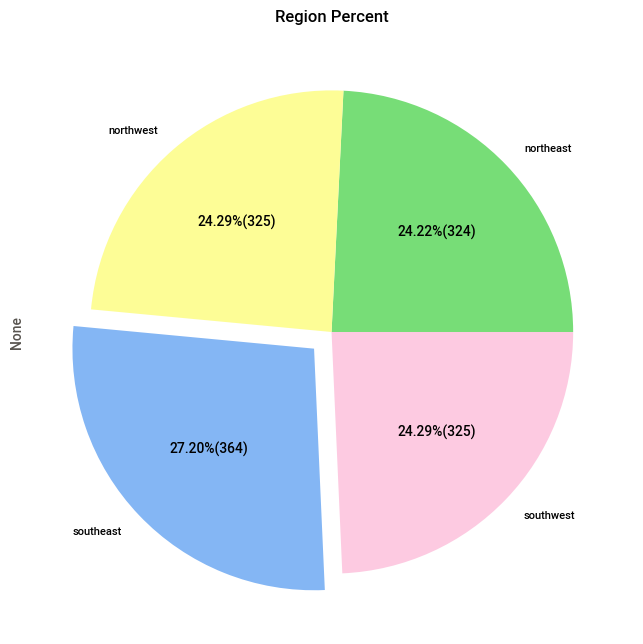

In [13]:
region_serie=df.groupby('region').size()
title="Region Percent"
colors=['#77dd77','#fdfd96','#84b6f4','#fdcae1']
explode= [0,0,0.1,0]
region_pie=Pie_Option(region_serie,title,colors,explode)
region_pie.option_plot("region")

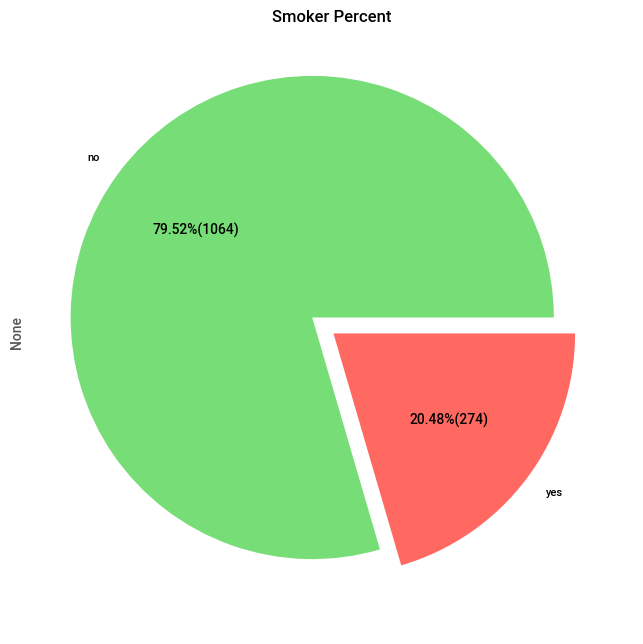

In [14]:
smoker_serie=df.groupby('smoker').size()
title="Smoker Percent"
colors=['#77dd77','#ff6961']
explode=[0.1,0.01]
smoker_pie=Pie_Option(smoker_serie,title,colors,explode)
smoker_pie.option_plot("smoker")

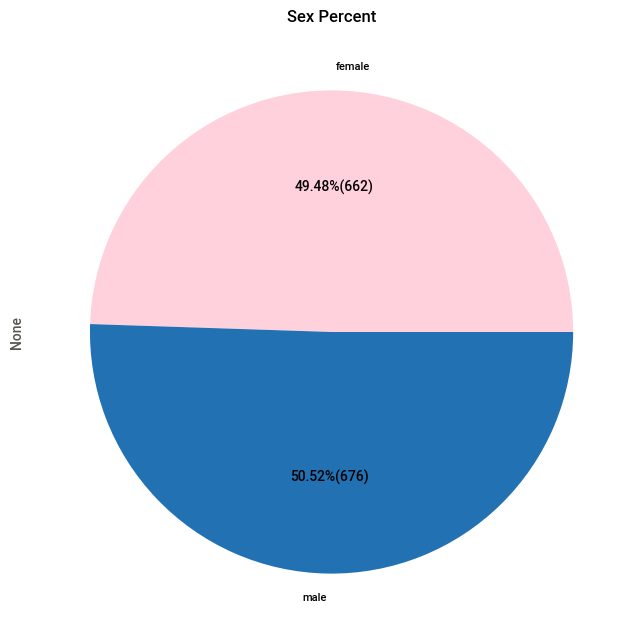

In [15]:
sex_serie=df.groupby('sex').size()
title="Sex Percent"
colors=['#FFD1DC','#2271b3']
explode=[0,0]
smoker_pie=Pie_Option(sex_serie,title,colors,explode)
smoker_pie.option_plot("sex")

In [16]:
dum1 = pd.get_dummies(df.region)
df1= pd.concat(((df,dum1)),axis=1)
df1.head()

,age,sex,bmi,children,smoker,region,charges,medical_problem,northeast,northwest,southeast,southwest
0,18,male,33.770,1,no,southeast,1725.55230,light,0,0,1,0
1,28,male,33.000,3,no,southeast,4449.46200,light,0,0,1,0
2,33,male,22.705,0,no,northwest,21984.47061,severe,0,1,0,0
3,32,male,28.880,0,no,northwest,3866.85520,light,0,1,0,0
4,31,female,25.740,0,no,southeast,3756.62160,light,0,0,1,0


In [17]:
df2=df1.drop(['region'],axis='columns')


In [18]:

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df2['medical_problem']= label_encoder.fit_transform(df2['medical_problem'])
df2['medical_problem'].unique()

array([0, 1])

In [19]:
df2.head()

,age,sex,bmi,children,smoker,charges,medical_problem,northeast,northwest,southeast,southwest
0,18,male,33.770,1,no,1725.55230,0,0,0,1,0
1,28,male,33.000,3,no,4449.46200,0,0,0,1,0
2,33,male,22.705,0,no,21984.47061,1,0,1,0,0
3,32,male,28.880,0,no,3866.85520,0,0,1,0,0
4,31,female,25.740,0,no,3756.62160,0,0,0,1,0


In [20]:
x=df2.drop(['charges'],axis=1)
y1=df2['charges']

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,4])], remainder='passthrough')
x1 = np.array(ct.fit_transform(x))
print(x1)

[[0. 1. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 0. 0.]]


In [22]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 1/3, random_state = 0)

print(x1_train.shape)
print(x1_test.shape)

(892, 12)
(446, 12)


In [23]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 11.9 MB/s 


In [35]:
#XGBRegressor
from xgboost import XGBRegressor
import shap
xgb_reg=XGBRegressor(max_depth=3,learning_rate=0.01,n_estimators=596,random_state=42)
xgb_reg.fit(x1_train,y1_train) 
lass_pred = xgb_reg.predict(x1_test)
print("Accuracy score XGBRegressor ",xgb_reg.score(x1_test,y1_test))
explainer = shap.TreeExplainer(xgb_reg)
shap_values = explainer.shap_values(x1_test)

[18:08:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy score XGBRegressor  0.9754180650460071


In [34]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.07, normalize=True)
ridgeReg.fit(x1_train,y1_train)
y2_pred = ridgeReg.predict(x1_test)
print("Accuracy score of Ridge Regression",ridgeReg.score(x1_test,y1_test))

Accuracy score of Ridge Regression 0.9691094577030688


In [33]:
#DecisionTreeRegressor 
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(x1_train,y1_train)
print("Accuracy score of Decision Tree",regressor.score(x1_test,y1_test))
tree_pred = regressor.predict(x1_test)
 

Accuracy score of Decision Tree 0.9613088800863862


In [31]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x1_train,y1_train)
print("Accuracy score of Multiple linear",reg.score(x1_test,y1_test))
ml_pred = reg.predict(x1_test)

Accuracy score of Multiple linear 0.9705149558600927


In [38]:
def Eval(y1_pred):
  d = y1_test-y1_pred
  mse_f = np.mean(d**2)
  mae_f = np.mean(abs(d))
  rmse_f = np.sqrt(mse_f)
  r2_f = 1-(sum(d**2)/sum((y1_test-np.mean(y1_test))**2))
  m=" "
  
  print(mae_f," |",mse_f," |",rmse_f," |",r2_f)
  #print("MAE      :",mae_f)
  #print("MSE      :", mse_f)
  #print("RMSE     :", rmse_f)
  #print("R-Squared:", r2_f)
  return(m)

print("      ","   Model                  MAE             MSE               RMSE               R-Squared ","\nmultiple regression    |",end="")



print("Ridge Regression        |",Eval(ml_pred),end="")
#ML=Eval(ml_pred)
print("XGBRegressor            |",Eval(y2_pred),end="")
#red=Eval(y2_pred)
print("DecisionTreeRegressor   |",Eval(lass_pred),end="")
#lass=Eval(pred)
print(Eval(tree_pred))


          Model                  MAE             MSE               RMSE               R-Squared  
multiple regression    |1154.3867674183089  | 4523024.088956333  | 2126.7402495265687  | 0.9705149558600927
Ridge Regression        |  1302.7672776019053  | 4738628.37942436  | 2176.8390798183405  | 0.9691094577030688
XGBRegressor            |  970.0265550306544  | 3770884.093728785  | 1941.8764362669385  | 0.9754180650460071
DecisionTreeRegressor   |  1165.2102476681612  | 5935241.832014575  | 2436.235175842959  | 0.9613088800863862
 


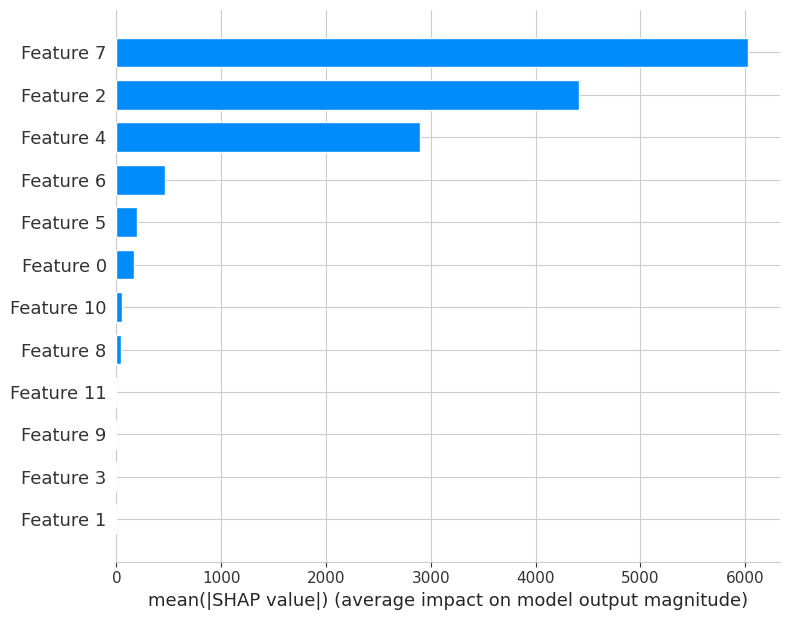

In [29]:
def plot_importance():
    
    sns.set_style(style="whitegrid")
    shap.summary_plot(shap_values, x1_test, plot_type="bar")
    
    return plt.show()
if __name__ == "__main__":
    plot_importance()

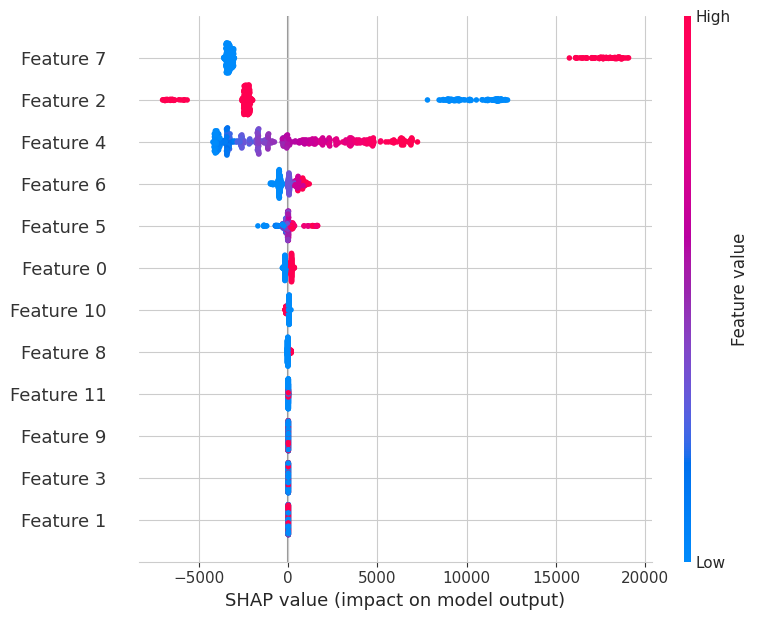

In [30]:
shap.summary_plot(shap_values, x1_test)